# King County Housing Characteristics

In [299]:
# Add image here of Tableau prices

Using multiple linear regression analysis models to infer the price of homes based on their existing characteristics.

**Business problem:**

King County home sales have been increasing as Seattle continues to grow. Top notch labor and a favorable climate make King County a desirable place to live and work. Our real estate team has been tasked with advising clients on the fair value of their home. When our team lists our client's homes, we want to ensure the price is accurate compared to the market.

The model also guides clients on which features to prioritize for increasing home value. This can include renovation, expanding square footage, or other suggestions within the owners control.

## Data

- 21,597 rows by 21 columns
- CSV Formatted

## Roadmap

- Scrub data to handle null values and duplicates
- Add additional features to better infer the price of home based on existing characteristics
- Check for linearity and multicollinearity to make sure that model meets relevant assumptions
- Perform outlier removal methods to better meet the assumptions of the linear regression model
- Provide accompanying visualizations to support and interpret the findings of the model
- Circle back to how the multiple linear regression model supports the recommendations for how prices can be predicted based on existing characteristics

# Scrub Data

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


## Descriptions of columns

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Quality of view
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [301]:
# Evaluating if type matches column description

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Date should be a datetime object
- Sqft basement should be an integer, not object

In [302]:
# Make date into datetime object

df['date'] = pd.to_datetime(df['date'])

In [303]:
# Observe summary statistics

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


- ID is a random value so should not be evaluated as a continuous variable
- Price has a large standard deviation and most likely contains outlier values
- Waterfront is a binary variable
- Floors, view, condition, and grade are discrete variables
- Zipcode, latitude, and longitude are not continuous variables


## Handling Null Values

<AxesSubplot:>

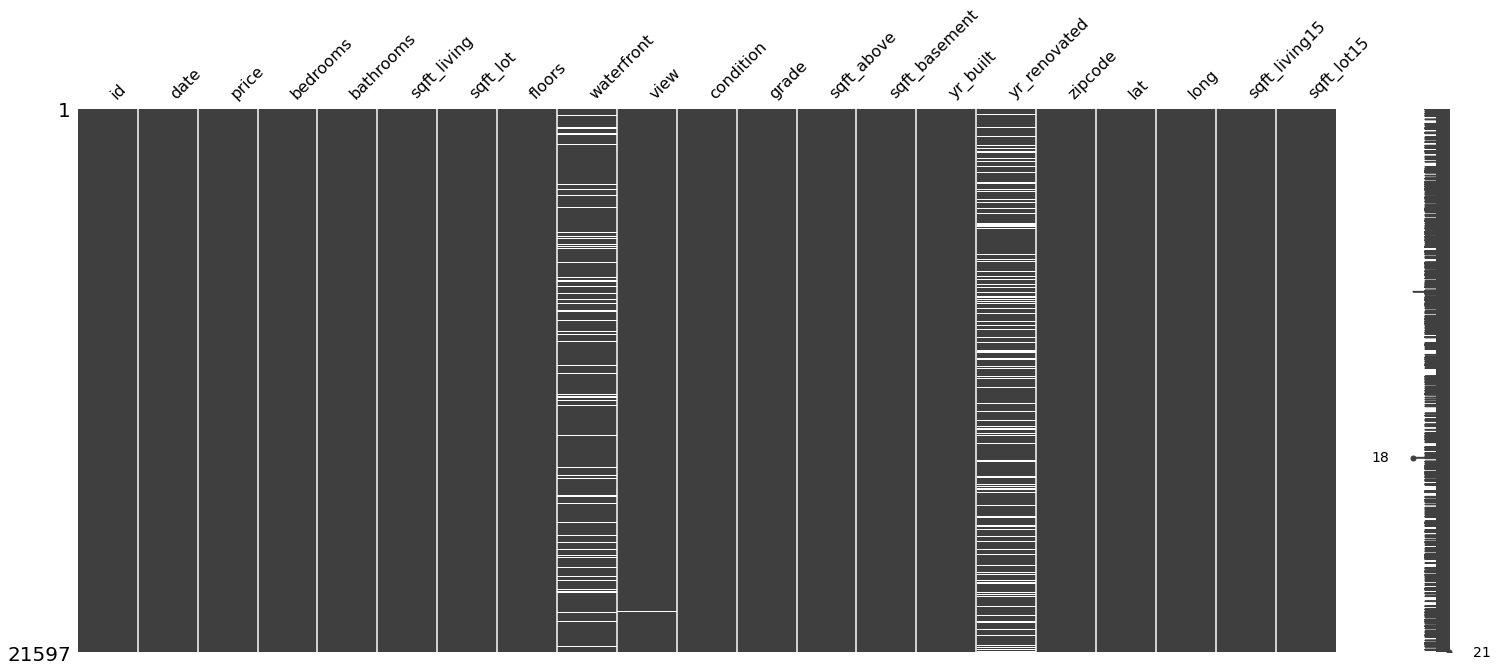

In [304]:
# Visualize which columns contain null values

import missingno
missingno.matrix(df)

Waterfront, view, and yr_renovated contain null values

In [305]:
# Check how many null values are in each column

null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [306]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

### Fill in missing Values for 'view' column
Interpreting 'view' as quality of the view from the home. For example, a 4 would be a stunning view, maybe of the mountains or a lake. Can be a beautiful view of the home of nature, or the urban environmnt. A view of 1 would be described as highly undesirable, like looking directly into a neighbor's property, or an unappealing natural characteristic. 

In [307]:
print('Value Counts Normalized')
print(df['view'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['view'].value_counts(dropna=False))

Value Counts Normalized
0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64
------------------------
Value Counts Absolute
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
nan        63
Name: view, dtype: int64


I have gone ahead and made the assumption that a **nan** represents a value that is missing completely at random. I will use impute_cat to insert a value between 0-4 based on the probability of the original variables distribution
- 90% chance of imputing a 0
- 2% chance of imputing a 1
- 4% of imputing a 2
- 2% of imputing a 3
- 1% of imputing a 4

In [308]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,nan,0.00,3,8,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [309]:
# Confirm that there are no more null values in the view column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'yr_renovated' column
Describes when the home was most recently renovated

In [310]:
print('Value Counts Normalized')
print(df['yr_renovated'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['yr_renovated'].value_counts(dropna=False))

Value Counts Normalized
0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64
------------------------
Value Counts Absolute
0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64


Most of the values in yr_renovated are either 0 or nan

In [311]:
df[df['yr_renovated']>0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,744.00,744.00,744.00,744.00,744.00,744.00,744.00,652.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4418716401.67,768901.89,3.46,2.31,2327.38,16215.53,1.50,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2908265353.00,627125.79,1.07,0.90,1089.00,38235.31,0.49,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3600057.00,110000.00,1.00,0.75,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1922984893.00,412250.00,3.00,1.75,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3899100167.50,607502.00,3.00,2.25,2200.00,7375.00,1.50,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7014200237.50,900000.00,4.00,2.75,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9829200250.00,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


The most recent renovation took place in 2015. The oldest recorded renovation was in 1934

In [312]:
# Going to assume that a null value means that the home has never been renovated
# This is equivalent to a 0 which is why I am filling null values with 0

df['yr_renovated'].fillna(0, inplace=True)

In [313]:
# Confirm that there are no more null values in the yr_renovated column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'waterfront' column
Waterfront is a binary variable. 1 means the home has a view of the water. 0 means the home does not have a view of the water
- Based on national home prices, waterfront properties tend to be more expensive than non-waterfront homes. People appreciate the view of the ocean, or a lake, and enjoy easy access to bodies of water especially during the summer
- I'd like to explore if homes prices at greater than $1,000,000 are more likely to have a waterfront view
- I can then use this finding to subset the data based on a home prices threshold and impute the missing waterfront variables with more accuracy

In [314]:
# Check if mean of price is greater for homes with waterfront views

df.groupby('waterfront')[['price', 'view']].mean()

,price,view
waterfront,,
0.00,532641.99,0.20
1.00,1717214.73,3.76


As expected, waterfront homes have a greater mean price than non-waterfront homes. Their view score is also much higher because the proximity to water. It is easier to see the ocean, lake, or river which enhances the view score as it is a desirable natural feature

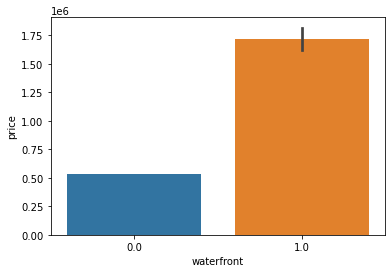

In [315]:
import seaborn as sns

sns.barplot(data=df, x='waterfront', y='price', ci=68);

Clearly, waterfront homes are more expensive than non-waterfront homes

In [316]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [317]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


- 7.3% of homes priced over \$1 million have waterfront views
- 0.02% of homes priced under \$1 million have waterfront views
- As a result, I am going to subset the data by a \$1 million threshold limit and then impute the missing variables. The reason I am doing this is because the more expensive homes are far more likely to have waterfront views and I don't want them to have the same probability of being assigned a waterfront view. 

In [318]:
# Subset the data into two slices based on $1 million threshold

df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [319]:
# Use impute_cat on homes over $1,000,000

df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [320]:
# Simply fill the missing waterfront values with 0 for homes under $1,000,000 because the
# probability of them having a waterfront view is far lower

df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-320-3a74373b56b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [321]:
# Join the data back together

df=pd.concat([df_1mminus, df_1mplus])

In [322]:
# Confirm there are no more missing values

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing values are handled, next step is to address duplicate values

## Handling Duplicates

In [323]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Initially, it appears that we don't have any duplicates in the dataset. However, df.duplicated() only returns duplicate values if **all** columns in the row are matching. It may be produnt to check if there are any duplicates that appear in the 'id' column

In [324]:
# Check duplicats by 'id'
display(len(df))
df[df.duplicated(subset=['id'],keep=False)]


21565

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,2014-12-23,700000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
324,7520000520,2014-09-05,232000.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
325,7520000520,2015-03-11,240500.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
345,3969300030,2014-07-23,165000.00000,4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14294,3528000040,2014-10-01,1690000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
14295,3528000040,2015-03-26,1800000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
15999,5536100020,2015-05-12,1190000.00000,3,2.00000,2160,15788,1.00000,0.00000,0.00000,3,8,2160,0.0,1951,0.00000,98004,47.62270,-122.20700,2260,9787
18976,7856400300,2014-07-02,1410000.00000,2,2.50000,3180,9400,2.00000,0.00000,4.00000,5,10,2610,570.0,1985,0.00000,98006,47.56170,-122.15800,3760,9450


Here, we see that when we check for duplicates by 'id' we do have duplicate rows. The only difference between the first and last duplicate row is date and price. This leads me to believe that the duplicate is shown because there was a sale. As a result, I am only going to keep the 'last' value because I want to reflect the most recent change of value and accurate price.

In [325]:
df=df.drop_duplicates(subset=['id'], keep='last')
print(len(df))

21388


Our dataset went from 21,565 observations to 21,388. We removed 177 duplicate  values. 

In [326]:
# Confirm that there are no more duplicate observations in the dataset

df.duplicated(subset=['id'],keep=False).sum()

0

# Exploratory Data Analysis

- Explore the distribution of each variable and their relationship with price
- Determine if variables are discrete or continuious
- Determine if variables are categoric or numeric
- Check if their skew in the distribution or normal
- Check if their are outlier values and if they appear above the median or below the median

In [327]:
def distr_(df, col):
    """
    Produces a boxplot, scatterplot, and histogram/kde
    Produces summary statistics
    """
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()

## Handling Error in Basement encoding

When initially running the EDA check, sqft_basement throws an eror so going to further inspect what is causing the error

In [328]:
# Check values

df['sqft_basement'].value_counts(0)

0.0       12701
?           452
600.0       215
500.0       205
700.0       205
          ...  
475.0         1
2196.0        1
2120.0        1
1548.0        1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

452 values have a question mark. I am going to assume that a question mark means the data is missing. Since the question mark only represents ~2% of the data, changing it to 0 will not alter the original distribution of the data. Additionally, since there are a high number of 0 values ~59% of the data, I am going to turn sqft_basement into a binary variable. 0 for no basement, 1 for basement is present. Otherwise, the standard deviation will be very large and it will be difficult to interpret

In [329]:
# Replace the question mark with a zero

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)

In [330]:
df['sqft_basement'].value_counts(1)

0.0      0.61497
600.0    0.01005
700.0    0.00958
500.0    0.00958
800.0    0.00940
           ...  
2196.0   0.00005
475.0    0.00005
2120.0   0.00005
1548.0   0.00005
2240.0   0.00005
Name: sqft_basement, Length: 303, dtype: float64

Question mark is gone. 61% of homes do not have a basement

In [331]:
# Use .map to make sqft_basement into a binary variable

df['basementyes'] = (df['sqft_basement']>'0.0').map({True:1,
                                                      False: 0})

In [332]:
# Confirm that original sqft_basement and new column have equal distribution of 0 and 1 variables

df['basementyes'].value_counts(1)

0   0.61497
1   0.38503
Name: basementyes, dtype: float64

In [333]:
# Drop sqft_basement because we are replacing it with a binary reprsentation (either a home has a basement
# or it does not)

df=df.drop('sqft_basement', axis=1)

## Return to checking distributions, outliers, and relationship with price

Price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05


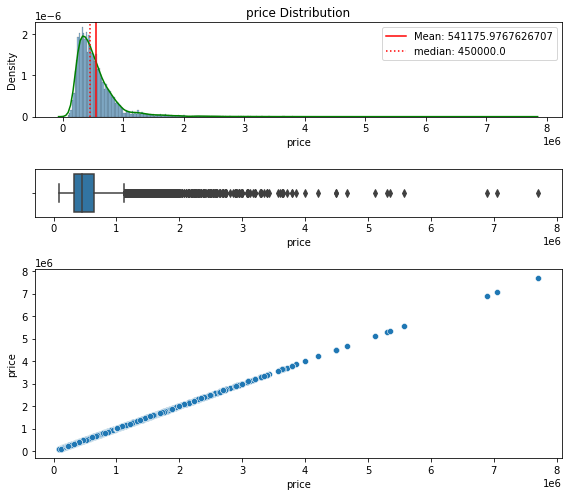

None
---------------------------------------------------------------------------------------
Bedrooms Summary
Median: 3.0
Mean: 3.373
Max: 33
Min: 1
Std: 0.9252


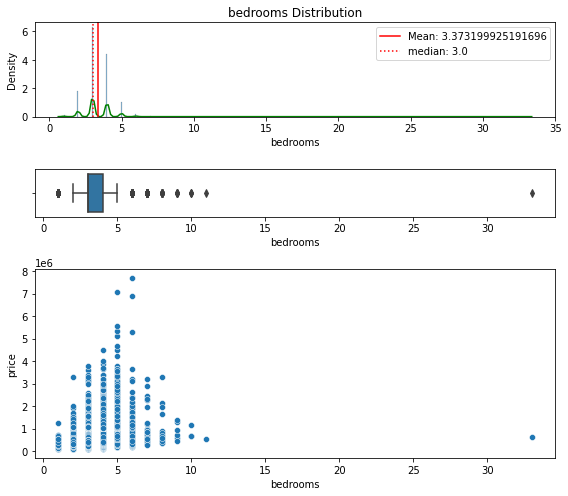

None
---------------------------------------------------------------------------------------
Bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685


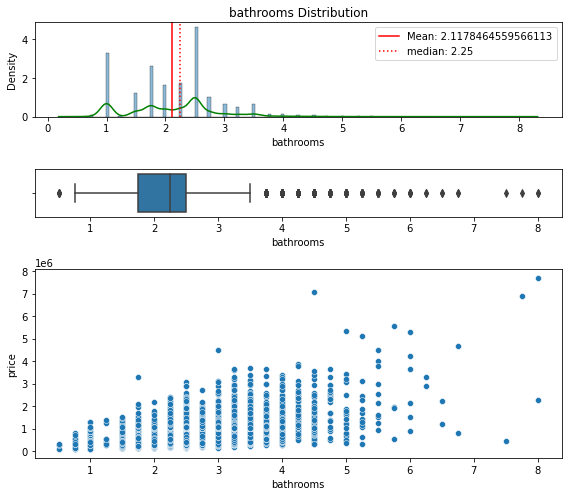

None
---------------------------------------------------------------------------------------
Sqft_living Summary
Median: 1920.0
Mean: 2.082e+03
Max: 13540
Min: 370
Std: 918.7


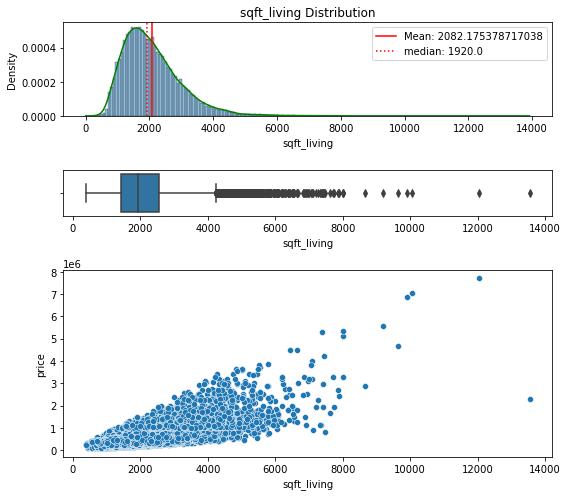

None
---------------------------------------------------------------------------------------
Sqft_lot Summary
Median: 7610.0
Mean: 1.513e+04
Max: 1651359
Min: 520
Std: 4.156e+04


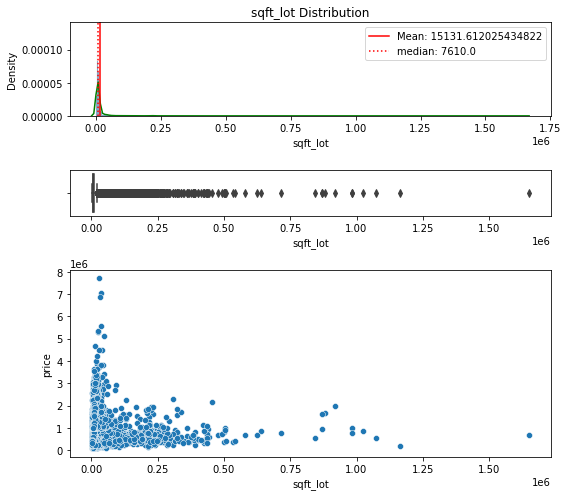

None
---------------------------------------------------------------------------------------
Floors Summary
Median: 1.5
Mean: 1.496
Max: 3.5
Min: 1.0
Std: 0.54


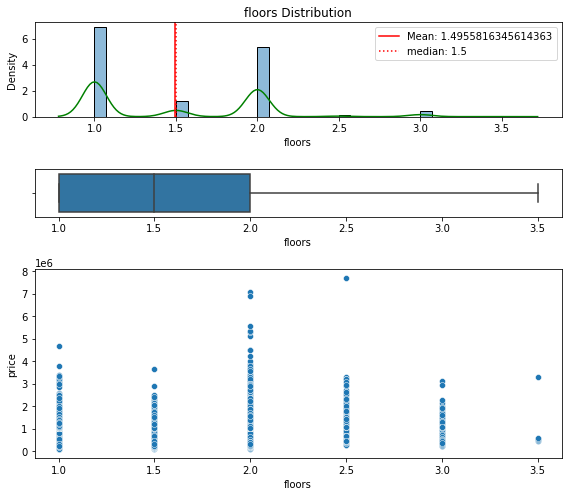

None
---------------------------------------------------------------------------------------
Waterfront Summary
Median: 0.0
Mean: 0.01375
Max: 1.0
Min: 0.0
Std: 0.1164


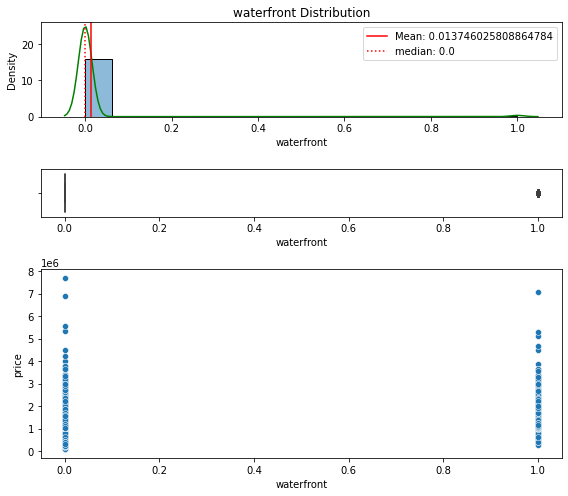

None
---------------------------------------------------------------------------------------
View Summary
Median: 0.0
Mean: 0.2332
Max: 4.0
Min: 0.0
Std: 0.7639


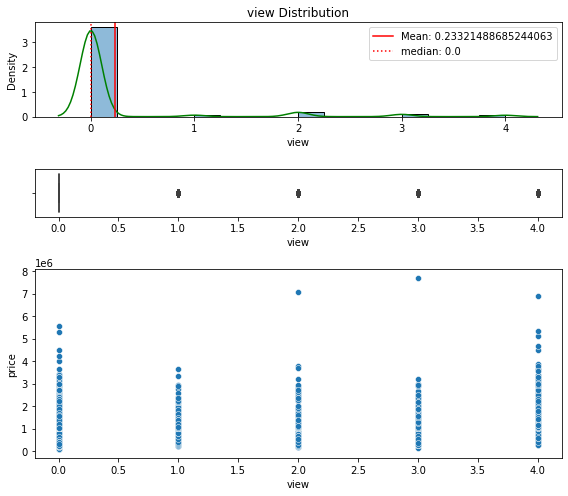

None
---------------------------------------------------------------------------------------
Condition Summary
Median: 3.0
Mean: 3.41
Max: 5
Min: 1
Std: 0.6496


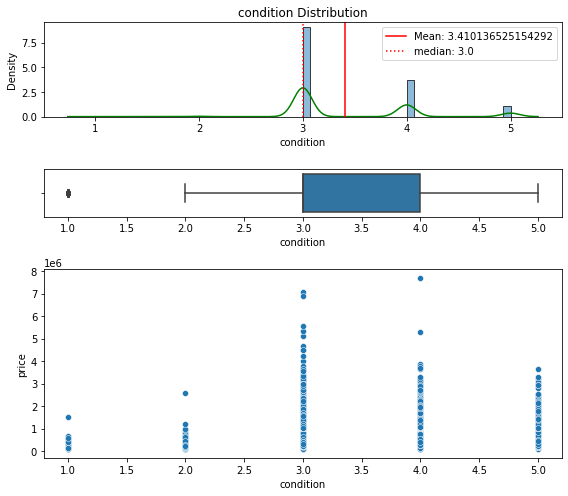

None
---------------------------------------------------------------------------------------
Grade Summary
Median: 7.0
Mean: 7.661
Max: 13
Min: 3
Std: 1.171


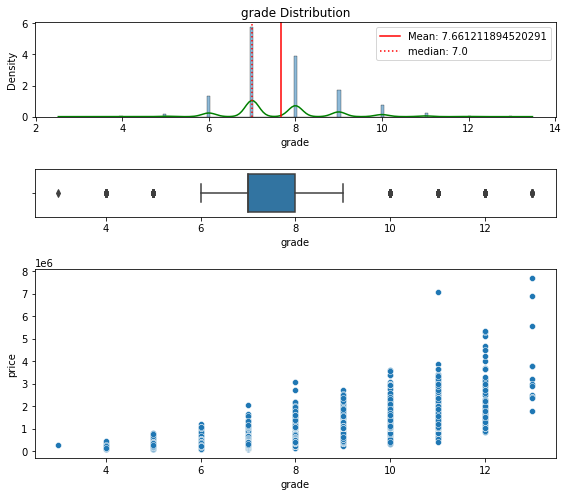

None
---------------------------------------------------------------------------------------
Sqft_above Summary
Median: 1560.0
Mean: 1.79e+03
Max: 9410
Min: 370
Std: 828.6


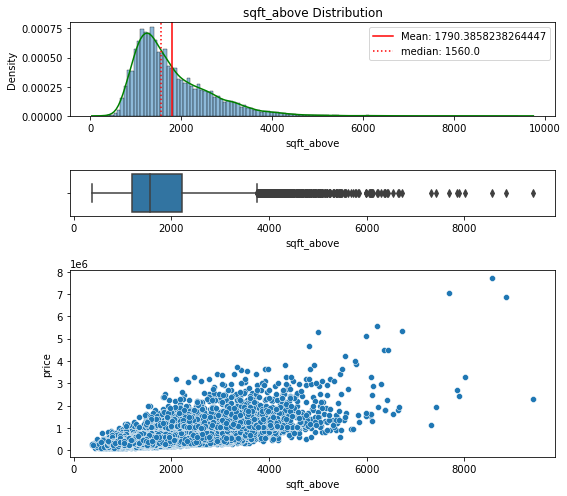

None
---------------------------------------------------------------------------------------
Yr_built Summary
Median: 1975.0
Mean: 1.971e+03
Max: 2015
Min: 1900
Std: 29.37


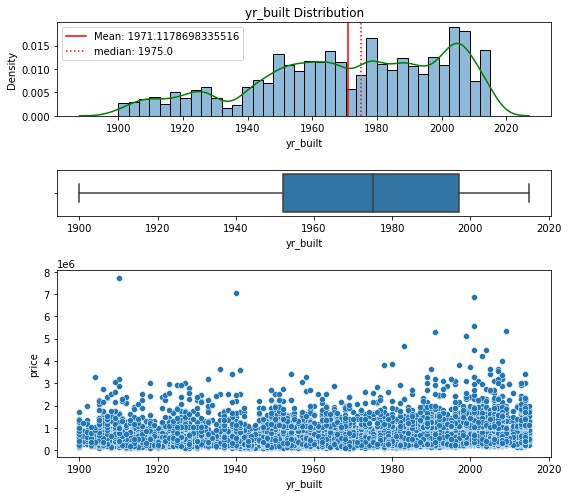

None
---------------------------------------------------------------------------------------
Yr_renovated Summary
Median: 0.0
Mean: 68.88
Max: 2015.0
Min: 0.0
Std: 364.3


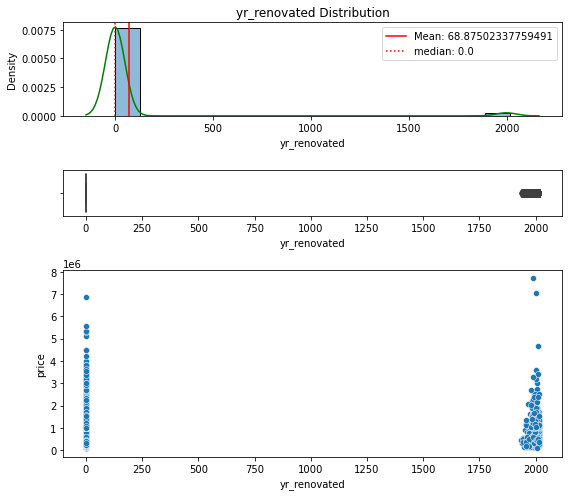

None
---------------------------------------------------------------------------------------
Zipcode Summary
Median: 98065.0
Mean: 9.808e+04
Max: 98199
Min: 98001
Std: 53.48


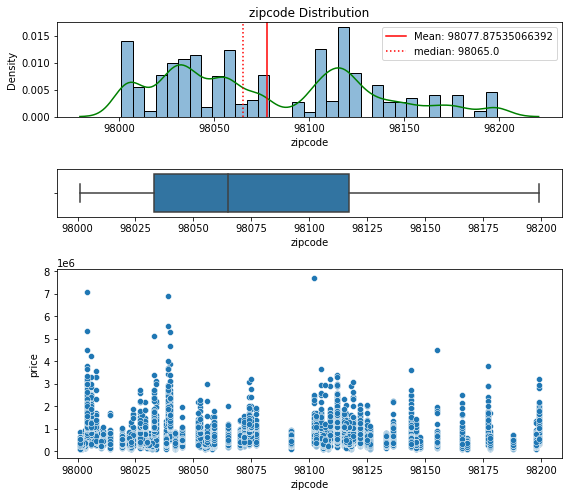

None
---------------------------------------------------------------------------------------
Lat Summary
Median: 47.5719
Mean: 47.56
Max: 47.7776
Min: 47.1559
Std: 0.1386


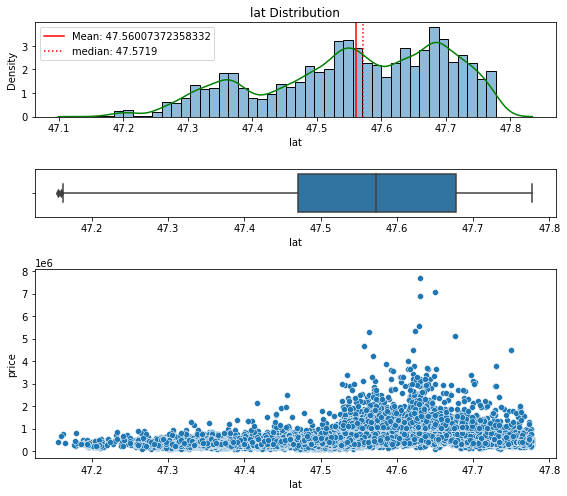

None
---------------------------------------------------------------------------------------
Long Summary
Median: -122.23
Mean: -122.2
Max: -121.315
Min: -122.51899999999999
Std: 0.1408


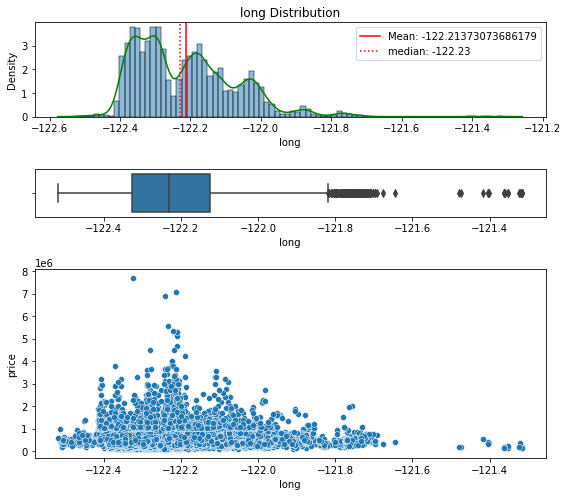

None
---------------------------------------------------------------------------------------
Sqft_living15 Summary
Median: 1840.0
Mean: 1.988e+03
Max: 6210
Min: 399
Std: 685.4


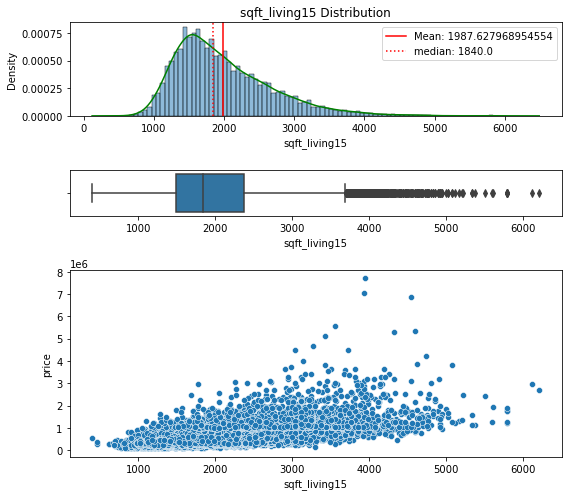

None
---------------------------------------------------------------------------------------
Sqft_lot15 Summary
Median: 7620.0
Mean: 1.278e+04
Max: 871200
Min: 651
Std: 2.736e+04


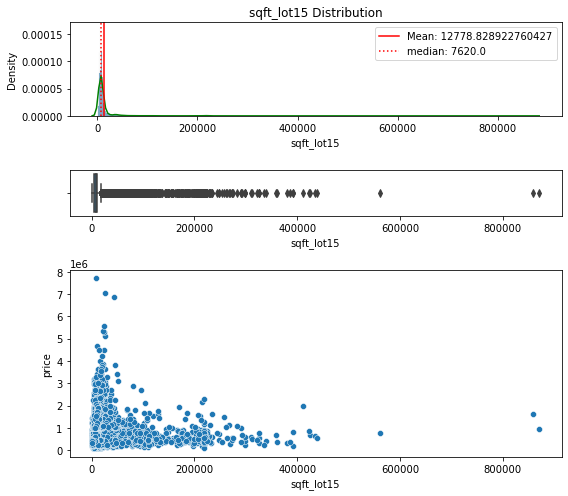

None
---------------------------------------------------------------------------------------
Basementyes Summary
Median: 0.0
Mean: 0.385
Max: 1
Min: 0
Std: 0.4866


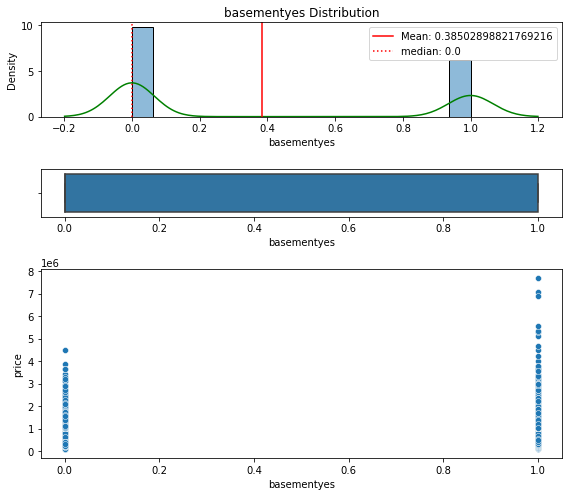

None
---------------------------------------------------------------------------------------


In [334]:
# Checking all variables except for id, zipcode, latitude, and longitude

eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')

### Individual EDA Analysis

1. Price
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold
    3. **Relationship with price**: NA
    
2. Bedrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold. Extreme outlier at 33 that should most likely be removed
    3. **Relationship with price**: Linear until 5/6 bedrooms
    4. **Discrete or Continuous**: Discrete-Possibly ordinal
    
3. Bathrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete-Ordinal

4. Sqft_living
    1. **Distribution**: Bimodal, skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

5. Sqft_lot
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Non-Linear
    4. **Discrete or Continuous**: Continuous

6. Floors
    1. **Distribution**: Bimodal, Right skewed
    2. **Outliers**: None
    3. **Relationship with price**: Non-Linear-Non Ordinal
    4. **Discrete or Continuous**: Discrete

7. Waterfront
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete - Binary

8. View
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete

9. Condition
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear. Seems to increase until 3 and then move down
    4. **Discrete or Continuous**: Discrete

10. Grade
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete

11. Sqft_above
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
 
12. Yr_Built
    1. **Distribution**: Left skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
13. Yr_Renovated
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
14. Sqft_living15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
    
15. Sqft_lot15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

15. Basementyes
    1. **Distribution**: Binary
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete-Binary

### Overall EDA Analysis

- Most of the continuous variables are right skeweed
- Supported by the distribution and mean being greater than the median
- High outlier values on the upper IQR threshold
- Yr_renovated has a lot of 0 values so may be improved by turning into a binary variable
- Bedrooms has a mistaken entry (33 bedrooms)

#### Handle Bedroom error

In [335]:
# Find the observation where bedroom is 33

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
15856,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0.00000,0.00000,5,7,1040,1947,0.00000,98103,47.68780,-122.33100,1330,4700,1


Appears to be a mistake because there is only 1.75 bathrooms and sqft living is only 1620. Going to drop column

In [336]:
df.drop(index=15856, inplace=True)

In [337]:
# Confirm it has been removed

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes


### Turn yr_renovated into binary values
- High amount of zero values, binary encoding will be a better indicator of relationship with price
- Otherwise, the standard deviation will be very high and it will be difficult to effectively interpret

In [338]:
df['yr_renovated'].value_counts(1)

0.00000      0.96549
2014.00000   0.00341
2003.00000   0.00145
2013.00000   0.00145
2007.00000   0.00140
               ...  
1934.00000   0.00005
1971.00000   0.00005
1954.00000   0.00005
1950.00000   0.00005
1944.00000   0.00005
Name: yr_renovated, Length: 70, dtype: float64

Aprox. 97% of values suggest the home has not been renovated. Safe to encode as has been renovated or has not been renovated

In [339]:
df['renovated_yes'] = (df['yr_renovated']>0).map({True:1,
                                                   False: 0})


In [340]:
# Confirm distribution has not changed

df['renovated_yes'].value_counts(1)

0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64

In [341]:
# Dropping yr_renovated because we are replacing it with a binary variable

df.drop('yr_renovated', axis=1, inplace=True)

# Feature Engineering

- Explore adding additional predictor values to the model so that it can more accurately predict price
- Feature engineering allows for us to broaden our predictor values then what we are limited to with the original dataset
- Be cautious of multicollinearity because features will be engineering by transforming existing columns

## Total Rooms
- Add bedrooms and bathrooms to create new column called total_rooms
- This will provide us a summary of the number of rooms in the home

In [342]:
# Combine bedrooms and bathrooms

df['total_rooms'] = df['bedrooms']+df['bathrooms']

Total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


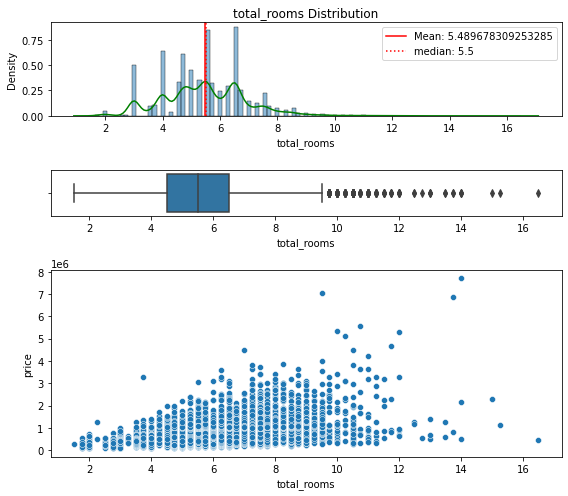

In [343]:
distr_(df, 'total_rooms')

- Distribution is not normal
- Looks like there are a significant number of outliers to the right of the upper IQR threshold
- Initially looks like there is a positive linear relationship wiht price

## Backyard Size as a proportion of the total lot
- Use sqft_above/sqft_lot as a proxy for backyard size
- Essentially, we are capturing how big the home is compared to the lot
- A larger value means a relatively smaller backyard and vice versa

In [344]:
# Divide sqft_living/sqft_lot
# Using sqft_above as opposed to sqft_living because living includes basement which we removed from our dataset

df['live_lot'] = df['sqft_above']/df['sqft_lot']

Live_lot Summary
Median: 0.20274485339987525
Mean: 0.2808
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2426


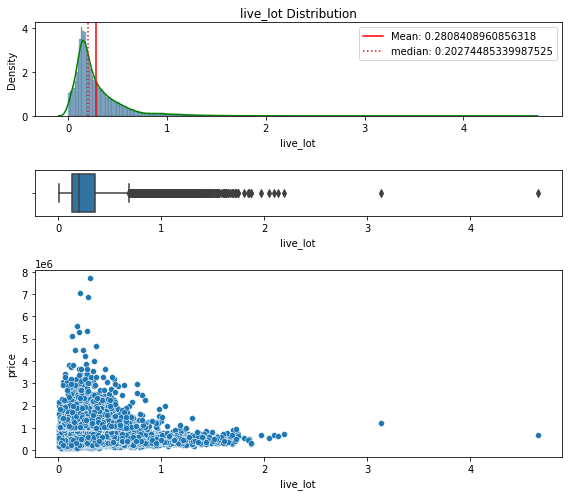

In [345]:
distr_(df, 'live_lot')

- Data is right skewed
- Significant number of outliers to the right of the upper IQR threshold
- Values may be greater than 1 because the living space can be greater than the lot space in the event that a house is built on a small lot and has many floors. In other words, it has a lot of sqft footage on the inside because it goes up vertically

## Comparison of Square Foot living and Lot vs Neighbors

- Sqft_living15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the living space of the observed home compares to the neighbors

In [346]:
# SQF_living compared to neighbors
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

Living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


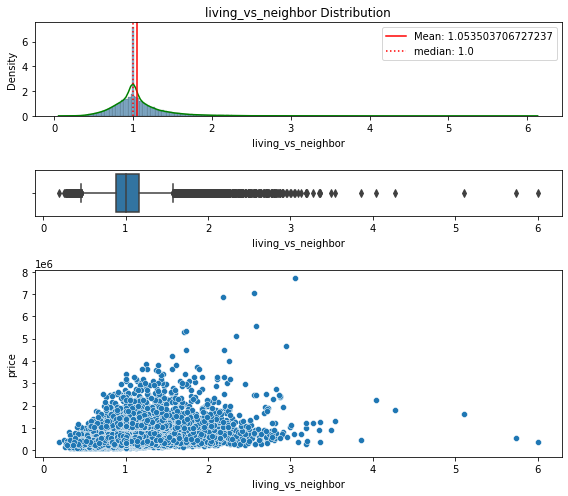

In [347]:
distr_(df, 'living_vs_neighbor')

- Data looks pretty normally distributed because mean and median are very close
- Outliers to the right of the upper threshold
- Unclear if there is a linear relationship with price
- A lot of the much larger homes in comparison to the neighbors actually have a negative relationship with price

- Sqft_lot15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the lot size of the observed home compares to the neighbors

In [348]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

Lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


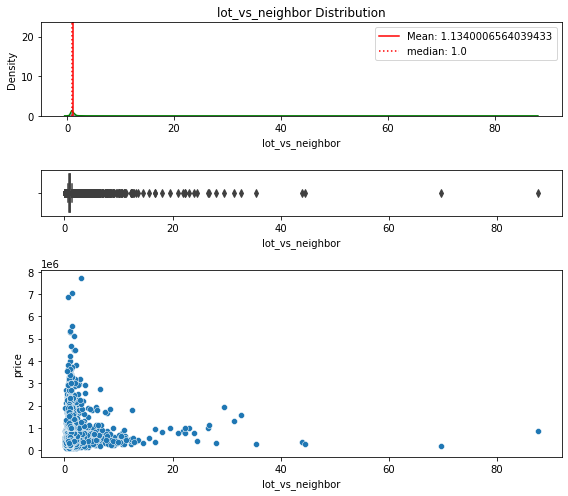

In [349]:
distr_(df, 'lot_vs_neighbor')

- Hard to tell distribution because there are clearly significant outlier values
- There are values greater than 80 which seem unreasonable unless there is a neighborhood with apartments and one extremely large home
- Linearity seems unlinkely because as lot_vs_neighbor increases, the change in price is not constant

# Check Assumptions of Linearity and Multicollinearity

- For the model to provide acccurate inferences, it must meet assumptions of linearity and multicollinearity

## Check Assumption of Linearity

- There must be a linear relationship between the predictor variable and target variable
    - In our case, the predictor variable refers to the home features and the target refers to price
- By linear relationship, we mean that as the x-value increases, the y-value must change by a constant amount
- If we do not meet assumption of linearity, our model will not accuratly infer home prices
- Must check each predictor that we are we going to include in the model

In [350]:
def lin_check(df, cols, ncols=4, figsize=(20,15)):
    """
    Produces regplot for each feature against price
    """
    if ncols%4==0:
        fig, axes = plt.subplots(nrows=(len(cols)//ncols), ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()
    else:        
        fig, axes = plt.subplots(nrows=(len(cols)//ncols)+1, ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()

In [351]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [352]:
# Choosing to remove latitude and longitude from predictor variables because zip code 
# is a sufficient proxy for location. Additionally, for matters of interpretability, it
# will be easier for residents to understand zip code recommendations as opposed to lat/long

cols_to_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode','sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor']

In [353]:
# Checking for linearity between predictor values and price

#lin_check(df, cols_to_check)

The following cells do not have a linear relationship with price:
- Sqft_lot
- Floors (categorical)
- View (categorical)
- Condition (categorical)
- Yr_built
- Zip code (categorical)
- Basementyes (categorical)
- Renovatedyes (categorical)
- Sqft_lot15
- Live_lot

Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric variables that very clearly do not have a linear relationship with price. Of the categorical variables that do not have a linear relationship with price, will proceed by creater bar plots to evaluate their relationship with price. If there is not a clear linear relationship with price, I will One Hot Encode them

In [354]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [355]:
cols_to_drop = ['sqft_lot', 'sqft_lot15', 'live_lot', 'yr_built']
df_lin = df.drop(cols_to_drop, axis=1)

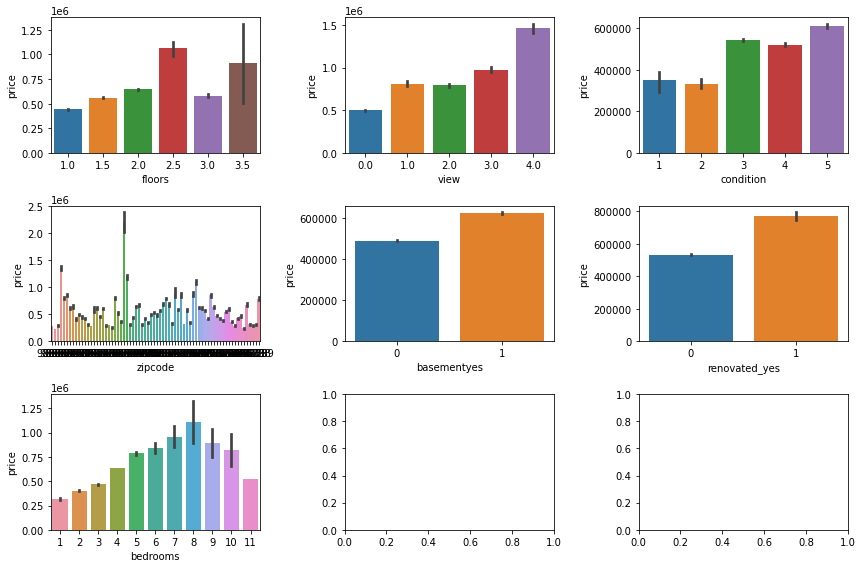

In [356]:
# Checking if categorical variables appear to have a linear relationship with price

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'basementyes', 'renovated_yes', 'bedrooms']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
for ax, col in zip(axes.flatten(), cat_bars):
    sns.barplot(data=df, x=col, y='price', ax=ax, ci=68)
    fig.tight_layout()
    

- Floors, and zipcode do not have linear relationships with price
- Condition is close, but roughly has a linear relationship with price
- Will turn floors, zip code, and bedrooms into OHE variables to see if they make an impact on the model

**Conclusion:**
- Will be dropping: Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric
- Will be One Hot Encoding: Floors, zipcode

## Check Assumption of Multicollinearity

For a multiple linear regression model to be accurate, it must meet the assumption that the predictor variables do not have multicollinearity. This means that not only should the predictors have a linear relationship with target, but they should not have a linear relationship with each other. In essense, if two variables move very close together, then they are redundant for inferential capabilities and may make it confusing to interpret which variable is contributing to the change in predictor values

RoadMap for checking assumptions of multicollinearity
1. Run initial check of correlation with price
2. Observe heatmap triangle to see which predictors have strong correlation with each other and price
3. Build table to show which variables have a correlation of greater than 0.75 with each other
    - 0.75 is the norm for determing if predictor values have muliticollinearity

In [357]:
# Check correlation with price

def initial_corr_check(df, col='price'):
    return df.corr()['price'].round(2).sort_values(ascending=False)

In [358]:
initial_corr_check(df_lin.drop(columns='id'))

price                 1.00000
sqft_living           0.70000
grade                 0.67000
sqft_above            0.60000
sqft_living15         0.58000
bathrooms             0.53000
total_rooms           0.47000
view                  0.39000
waterfront            0.34000
bedrooms              0.32000
lat                   0.31000
living_vs_neighbor    0.30000
floors                0.25000
basementyes           0.18000
renovated_yes         0.12000
lot_vs_neighbor       0.04000
condition             0.03000
long                  0.02000
zipcode              -0.05000
Name: price, dtype: float64

Initial correlation check shows that sqft_living, grade, and sqft_above have the most positive linear relationship with price

In [359]:
# Reference: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

def corr_triangle(df):
    """
    Correlation heatcamp, including price
    """
    corr2 = df.corr()
    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

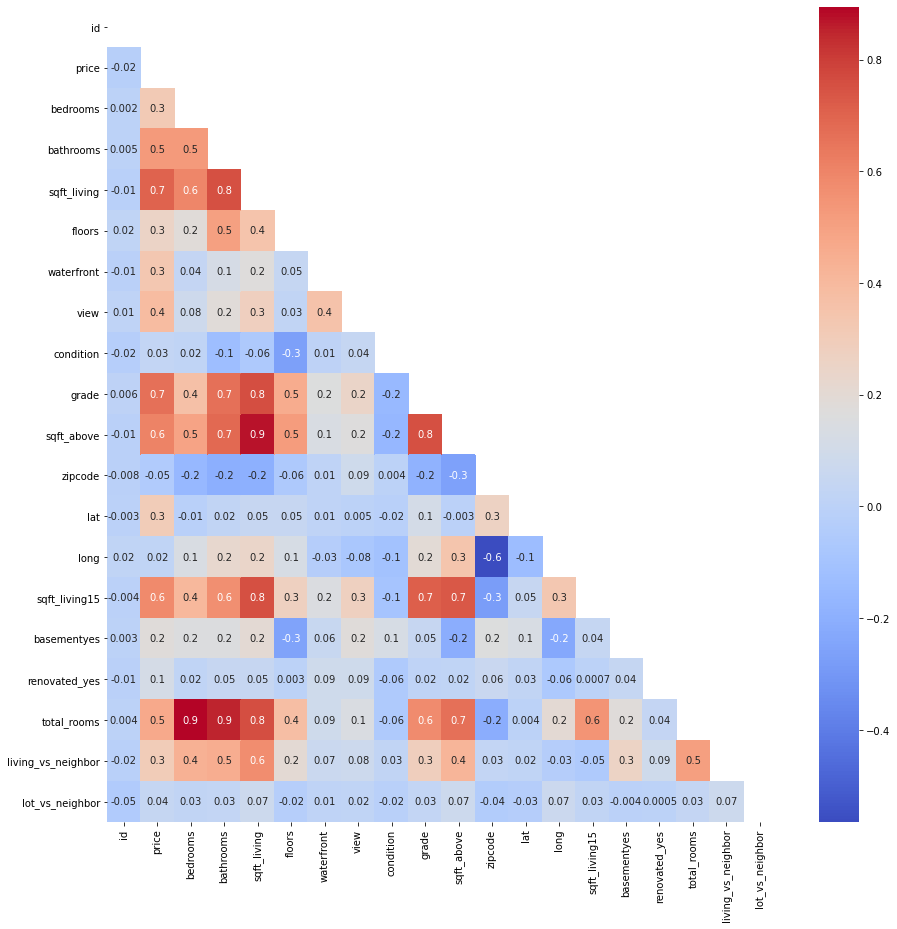

In [360]:
corr_triangle(df_lin)

There are a number of features that have strong multicollinearity. This is partially due to feature engineering and transforming existing columns to produce new columns
- Total rooms correlates strongly with bedrooms and bathrooms because that is how it was developed
- Sqft_living and sqft_living 15 are strongly correlated
- Sqft_living and sqft_above and grade are strongly correlated
    - Because sqft_living and sqft_above will be the same for homes that do not have basements

In [361]:
# Reference:https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

def corr_finder(df):
    """
    Shows pairs of features that have a correlation of greater than 0.75 with
    each other
    """
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [362]:
corr_finder(df_lin)

,cc
pairs,
"(total_rooms, bedrooms)",0.89510
"(sqft_above, sqft_living)",0.87655
"(bathrooms, total_rooms)",0.85186
"(sqft_living, total_rooms)",0.76392
"(grade, sqft_living)",0.76243
"(sqft_living15, sqft_living)",0.75630
"(sqft_above, grade)",0.75610
"(sqft_living, bathrooms)",0.75581


Methodology to handle collinearity:
- For each pair, drop the feature that has the lower correlation with price
    - Maintaining the feature that has a stronger relationship with price
        - Bedrooms & Total_Rooms: Drop Total Rooms because it has multicollinearity with many other features an reduces the nuance of the difference between suggesting adding either bedrooms or bathrooms
        - Sqft_living & Sqft_above: Drop Sqft_living because lower correlation with price. Additionally sqft_living included basement which we have now represented with a binary variable. Nuance of the basement is not lost
        - Total_Rooms and Bathrooms: Already eliminated Total_Rooms
        - Total_Rooms and Sqft_living: Already eliminated both features
        - Sqft_living15 and Sqft_living: Already eliminated sqft_living
        - Sqft_above and grade: Electing to keep because they represent very different features
        - Sqft_living and bathrooms: Already dropped sqft_living

In [363]:
cols_to_drop = ['total_rooms', 'sqft_living']
df_linco = df_lin.drop(cols_to_drop, axis=1)

In [364]:
# Confirm no multicollinearity issues except for sqft_above and grade
# Elected to keep because they represent very different predictions

corr_finder(df_linco)

,cc
pairs,
"(grade, sqft_above)",0.75610


Our model is now closer to meeting all the necessary assumptions to provide accurate inferences. Next steps will be to handle categorical variables with One Hot Encoding. 

# Model 1: Baseline Model
- Now that assumptions of linearity and no multicollinearity have been met, going to run a baseline OLS model
- Mainly observing R squared, Adjusted R squared, QQ Plot, and Homoskedacicity model
- Will check if certain variables are statistically insignificant based on their P-Value but will not be dropping variables because we have not yet handled outliers

What is R^2, Adjusted R^2, QQ Plot, and Homoskedacicity?

    - R^2: Indicated how much variance in the dependent variable is explained by the independent variable. This is our 'goodness of fit' test. The higher the value (between 0-1), the better our model does at explaining the variance of the dependent model
    
    - Adjusted R^2: Similar to R squared however it accounts for the number of independent variables. In other words, it has a downward biance as the number of independent variables increases.
    
    - Homoskedacicity: For our model to be accurate, it must meet the assumption of homoskedacicity. This means that our residuals (actual value-predicted value) cannot deviate accross different independent variables. The variance shuld not have a recognizable pattern
    
    - QQ Plot: Helps us measure homoskedacicity. Want to see the dots follow the 45 degree line. Shows us where the variance becomes non-uniform
    
    
    
    
    
Ref: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [365]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [366]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    display(model.summary())
    if qq==True:
        
        sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    
    return model

In [367]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, lr=None, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    if lr is None:
        lr = LinearRegression()
        lr.fit(df[X_cols], df[val])

        y_hat = lr.predict(df[X_cols])
    else:
        y_hat = lr.predict(df)

    
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

In [368]:
# Begin by using all columns as predictor values. Establishing a baseline model to then further iterate on

x_targs = ['bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'sqft_living15',
       'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2365.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:32:25   Log-Likelihood:            -2.9440e+05
No. Observations:               21387   AIC:                         5.888e+05
Df Residuals:                   21372   BIC:                         5.889e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.862e+07   3.15e+06    -15.445      0.000   -5.48e+07   -4.24e+07
bedrooms           -2.156e+04   2291.552     -9.410      0.000   -2.61e+04   -1.71e+04
bathrooms           8732.2132   3539.947      2.467      0.014    1793.651    1.57e+04
floors             -2.748e+04   3950.470     -6.957      0.000   -3.52e+04   -1.97e+04
waterfront          5.044e+05   1.46e+04     34.636      0.000    4.76e+05    5.33e+05
view                6.225e+04   2355.098     26.434      0.000    5.76e+04    6.69e+04
condition           6.537e+04   2558.315     25.550      0.000    6.04e+04    7.04e+04
grade               1.039e+05   2395.970     43.376      0.000    9.92e+04    1.09e+05
sqft_above           161.5551      6.223     25.963      0.000     149.358     173.752
zipcode              487.3027     32.082     15.189      0.000     424.420     550.185
sqft_living15         35.8724      6.526      5.496      0.000      23.080      48.665
basementyes          1.26e+05   5245.623     24.017      0.000    1.16e+05    1.36e+05
renovated_yes       1.496e+05   8745.999     17.106      0.000    1.32e+05    1.67e+05
living_vs_neighbor  6386.5289   1.06e+04      0.602      0.547   -1.44e+04    2.72e+04
lot_vs_neighbor      743.7773   1234.062      0.603      0.547   -1675.078    3162.632
==============================================================================
Omnibus:                    17692.010   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1556995.994
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      44.226   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

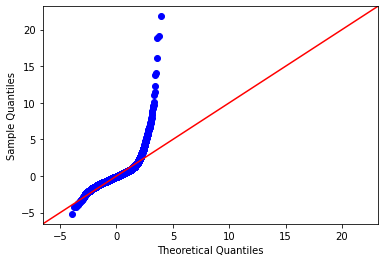

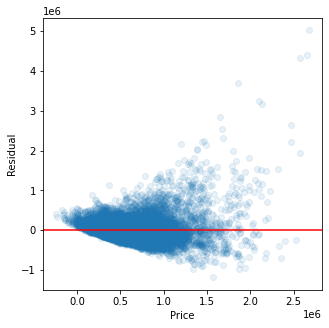

In [369]:
model_base = model_summary(df_linco, x_targs, 'price')
sked_show(df, x_targs, model_base)

**Conclusions**
- R^2: 0.602
- Adjusted R^2: 0.602
- QQ Plot: Deviates upwards at the 2nd/3rd quantile. Suggests we have high outlier values that the model is failing to explain
- Homoskedacicity: Becomes coem shaped aournd $1.25 million. Suggests outlier values
- Non-Statistically Significant Preditors: Living_vs_neighbor, lot_vs_neighbor

# Outlier Removal: IQR + Z-Score
- Due to high outliers shown in the QQ Plot, next step is to remove outliers
- Will try using Z-Score and IQR method
- Will evaluate data loss to determine which methodology I will pursue for modeling purposes

## IQR Method
- The IQR method uses quantiles to determine if a value is considered an outlier
- The process:
    1. Determine IQR which is calcuated as Quantile 3 - Quantile 1
    2. Upper Thresh: Quantile 3 * 1.5 *IQR
    3. Lower Thresh: Quantile 1 * 1.5 * -IQR
    4. Any values outside of the upper and lower thresholds are considered outlier values

- This method is more strict for evaluating outliers than Z-Score

### IQR Method Accross All Columns
- In this approach, we are going to classify outlier observations as those with at least one outlier accross all features
- For example, if an observation is has bedrooms which are an outlier, it will be removed from the dataset
- This method is more strict for determining outliers
- CAUTION: we may have significant data loss

In [370]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [371]:
df_linco.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long',
       'sqft_living15', 'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor'],
      dtype='object')

In [372]:
# Cols we are going to check with the IQR method
# Do not perform IQR check on binary variables or categorical variables like view and grade

iqr_check = ['price', 'bedrooms', 'bathrooms',
             'sqft_above', 'zipcode', 'sqft_living15',
            'living_vs_neighbor', 'lot_vs_neighbor']


In [373]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_linco[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr = df_linco[~iqr_outliers['total']].copy()

In [374]:
# Confirm that our data looks correct in terms of columns

df_iqr.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
0,7129300520,2014-10-13,221900.00000,3,1.00000,1.00000,0.00000,0.00000,3,7,1180,98178,47.51120,-122.25700,1340,0,0,0.88060,1.00000
1,6414100192,2014-12-09,538000.00000,3,2.25000,2.00000,0.00000,0.00000,3,7,2170,98125,47.72100,-122.31900,1690,1,1,1.52071,0.94803
3,2487200875,2014-12-09,604000.00000,4,3.00000,1.00000,0.00000,0.00000,5,7,1050,98136,47.52080,-122.39300,1360,1,0,1.44118,1.00000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1.00000,0.00000,0.00000,3,8,1680,98074,47.61680,-122.04500,1800,0,0,0.93333,1.07690
6,1321400060,2014-06-27,257500.00000,3,2.25000,2.00000,0.00000,0.00000,3,7,1715,98003,47.30970,-122.32700,2238,0,0,0.76631,1.00000


In [375]:
df_iqr.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000
mean,4736342048.51113,460996.41778,3.29384,2.00333,1.45598,0.00249,0.13937,3.41134,7.49898,1657.09151,98076.23567,47.55452,-122.21081,1911.96455,0.35620,0.02403,0.99507,0.99844
std,2878053849.49823,194853.02167,0.76451,0.64588,0.53106,0.04989,0.57082,0.63843,0.94825,647.59622,53.26624,0.14356,0.13912,572.75512,0.47889,0.15314,0.20137,0.11297
min,1200019.00000,81000.00000,2.00000,0.75000,1.00000,0.00000,0.00000,1.00000,4.00000,490.00000,98001.00000,47.17640,-122.50700,620.00000,0.00000,0.00000,0.46341,0.70212
25%,2297400020.00000,310000.00000,3.00000,1.50000,1.00000,0.00000,0.00000,3.00000,7.00000,1170.00000,98031.00000,47.45110,-122.32600,1480.00000,0.00000,0.00000,0.87554,0.94838
50%,4046710050.00000,425000.00000,3.00000,2.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1490.00000,98059.00000,47.56550,-122.22100,1810.00000,0.00000,0.00000,1.00000,1.00000
75%,7504400120.00000,578888.00000,4.00000,2.50000,2.00000,0.00000,0.00000,4.00000,8.00000,2020.00000,98117.00000,47.68150,-122.12300,2270.00000,1.00000,0.00000,1.09609,1.03465
max,9900000190.00000,1120000.00000,5.00000,3.50000,3.50000,1.00000,4.00000,5.00000,11.00000,3750.00000,98199.00000,47.77760,-121.31900,3690.00000,1.00000,1.00000,1.58065,1.32771


With the new DataFrame, the range of values has been constrained to the following:
- Price
    - Min: $81,000
    
    - Max: $1,120,000
- Bedrooms
    - Min: 0.75
    - Max: 5
- Floors
    - Min: 1
    - Max: 3.5

- Sqft_Above
    - Min: 460
    - Max: 3750

- Bathrooms:
    - Min: 0.75
    - Max: 3.5
    
This constrains our dataset to only be able to provide inferential capabilities for the above types of homes. The min and max price seem accurate because the QQ Plot was trailing off aroun $1.25 million

In [376]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_iqr):,}')
print(f'Num observations removed: {len(df)-len(df_iqr):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_iqr))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 15,233
Num observations removed: 6,154
Num observations removed as percent of original DF: 28.77%


With this type of outlier removal we have significant data loss. Aprox. 29% of our data will not be included for modeling purposes. Going to see how the model performs with these constraints

#### Model 2: IQR All Outliers Removed
- Check to see if assumption of homoskedacicity has improved
- Check if significant p-values has changed

In [377]:
df_iqr.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000,15233.00000
mean,4736342048.51113,460996.41778,3.29384,2.00333,1.45598,0.00249,0.13937,3.41134,7.49898,1657.09151,98076.23567,47.55452,-122.21081,1911.96455,0.35620,0.02403,0.99507,0.99844
std,2878053849.49823,194853.02167,0.76451,0.64588,0.53106,0.04989,0.57082,0.63843,0.94825,647.59622,53.26624,0.14356,0.13912,572.75512,0.47889,0.15314,0.20137,0.11297
min,1200019.00000,81000.00000,2.00000,0.75000,1.00000,0.00000,0.00000,1.00000,4.00000,490.00000,98001.00000,47.17640,-122.50700,620.00000,0.00000,0.00000,0.46341,0.70212
25%,2297400020.00000,310000.00000,3.00000,1.50000,1.00000,0.00000,0.00000,3.00000,7.00000,1170.00000,98031.00000,47.45110,-122.32600,1480.00000,0.00000,0.00000,0.87554,0.94838
50%,4046710050.00000,425000.00000,3.00000,2.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1490.00000,98059.00000,47.56550,-122.22100,1810.00000,0.00000,0.00000,1.00000,1.00000
75%,7504400120.00000,578888.00000,4.00000,2.50000,2.00000,0.00000,0.00000,4.00000,8.00000,2020.00000,98117.00000,47.68150,-122.12300,2270.00000,1.00000,0.00000,1.09609,1.03465
max,9900000190.00000,1120000.00000,5.00000,3.50000,3.50000,1.00000,4.00000,5.00000,11.00000,3750.00000,98199.00000,47.77760,-121.31900,3690.00000,1.00000,1.00000,1.58065,1.32771


In [378]:
x_targs = df_iqr.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price')]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1889.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:32:25   Log-Likelihood:            -1.9882e+05
No. Observations:               15233   AIC:                         3.977e+05
Df Residuals:                   15216   BIC:                         3.978e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.669e+07   1.86e+06    -14.347      0.000   -3.03e+07    -2.3e+07
bedrooms           -7382.0768   1542.063     -4.787      0.000   -1.04e+04   -4359.449
bathrooms          -1.292e+04   2304.430     -5.606      0.000   -1.74e+04   -8402.184
floors               1.57e+04   2492.984      6.297      0.000    1.08e+04    2.06e+04
waterfront          2.618e+05   1.86e+04     14.093      0.000    2.25e+05    2.98e+05
view                3.526e+04   1705.334     20.676      0.000    3.19e+04    3.86e+04
condition           4.741e+04   1532.673     30.933      0.000    4.44e+04    5.04e+04
grade               5.687e+04   1565.774     36.323      0.000    5.38e+04    5.99e+04
sqft_above            29.2561      5.041      5.804      0.000      19.376      39.137
zipcode             -132.5546     21.916     -6.048      0.000    -175.512     -89.597
lat                 5.841e+05   6827.754     85.547      0.000    5.71e+05    5.97e+05
long               -9.344e+04   8516.140    -10.972      0.000    -1.1e+05   -7.67e+04
sqft_living15        115.3897      5.030     22.939      0.000     105.530     125.250
basementyes         3.551e+04   3552.586      9.995      0.000    2.85e+04    4.25e+04
renovated_yes       9.798e+04   6030.796     16.247      0.000    8.62e+04     1.1e+05
living_vs_neighbor  1.017e+05   9013.224     11.285      0.000     8.4e+04    1.19e+05
lot_vs_neighbor     1125.3882   8160.854      0.138      0.890   -1.49e+04    1.71e+04
==============================================================================
Omnibus:                     1359.310   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2310.638
Skew:                           0.648   Prob(JB):                         0.00
Kurtosis:                       4.401   Cond. No.                     2.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

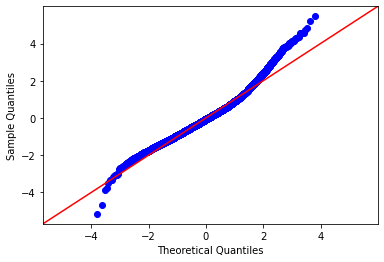

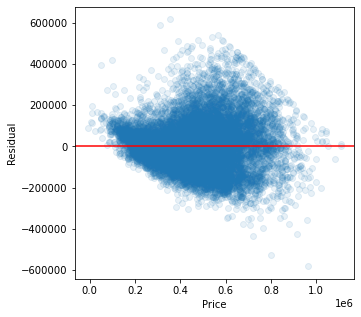

In [379]:
model_iqra = model_summary(df_iqr, x_targs, 'price')
sked_show(df_iqr, x_targs, model_iqra)

**Conclusions**
- R^2: 0.661
- Adjusted R^2: 0.661
- QQ Plot: Meets assumption but treads up slightly after the 2nd quantile
- Homoskedacicity: No cone shape, passes assumptions. Possibly slight cone shape as data moves towards $800,000. Significant improvement from baseline model
- Non-Statistically Significant Preditors: lot_vs_neighbor
- Not going to use this model because there is too much data loss

### IQR Price Outliers Removed
- Rather than considering an observation an outlier solely based on one feature, we are only considering an observation to be an outlier if price is an outlier
- This method reduces data loss because we are less strict on classifying outliers

In [380]:
# Finding the upper bound of the price threshold for outliers
# Since prices cannot be negative, we are not concerned with the lower bound

res=df_linco['price'].describe()
thresh = res['75%'] -res['25%']
u_bound=res['75%']+1.5*thresh
u_bound

1125564.75

Maximum price for this model will be $1,125,564

In [381]:
# Subsetting the data to only include values below the upper threshold that we have established

df_iqrp = df_linco[df_linco['price'] <=u_bound]

In [435]:
# Ensure that observations have been dropped 

print(len(df_iqrp))
print(df_iqrp['price'].max())

20235
1120000.0


In [383]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_iqrp):,}')
print(f'Num observations removed: {len(df)-len(df_iqrp):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_iqrp))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 20,235
Num observations removed: 1,152
Num observations removed as percent of original DF: 5.39%


With this type of outlier removal we have much lower data loss. Aprox. 5% of our data will not be included for modeling purposes. Going to see how the model performs with these constraints. 

Compared to removing values based on a single feature determinig an observation as an outlier, this method preserves far more data for our model

#### Model 3: IQR Price Outliers Removed
- Considering an observation an outlier if price is above threshold
- This method reduces data loss compared to previous model because we are less strict on classifying outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2638.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:32:25   Log-Likelihood:            -2.6495e+05
No. Observations:               20235   AIC:                         5.299e+05
Df Residuals:                   20218   BIC:                         5.301e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.883e+07   1.67e+06    -17.287      0.000   -3.21e+07   -2.56e+07
bedrooms           -7273.2515   1224.944     -5.938      0.000   -9674.241   -4872.262
bathrooms          -5584.0181   1914.684     -2.916      0.004   -9336.955   -1831.081
floors              1.104e+04   2139.005      5.161      0.000    6847.554    1.52e+04
waterfront          2.127e+05   1.27e+04     16.786      0.000    1.88e+05    2.38e+05
view                3.425e+04   1401.855     24.430      0.000    3.15e+04     3.7e+04
condition           4.374e+04   1361.354     32.130      0.000    4.11e+04    4.64e+04
grade               5.807e+04   1312.894     44.234      0.000    5.55e+04    6.06e+04
sqft_above            43.5091      3.729     11.669      0.000      36.201      50.817
zipcode             -128.5743     19.871     -6.470      0.000    -167.523     -89.626
lat                 5.885e+05   6255.270     94.080      0.000    5.76e+05    6.01e+05
long               -1.062e+05   7584.648    -14.008      0.000   -1.21e+05   -9.14e+04
sqft_living15         98.0344      3.781     25.930      0.000      90.624     105.445
basementyes         3.647e+04   2891.968     12.610      0.000    3.08e+04    4.21e+04
renovated_yes       8.522e+04   4857.025     17.545      0.000    7.57e+04    9.47e+04
living_vs_neighbor  8.875e+04   5874.257     15.108      0.000    7.72e+04       1e+05
lot_vs_neighbor     4789.8027    669.668      7.153      0.000    3477.198    6102.407
==============================================================================
Omnibus:                     1631.726   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2641.784
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                       4.273   Cond. No.                     1.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

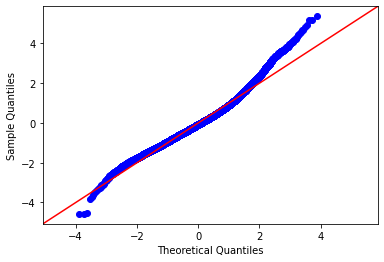

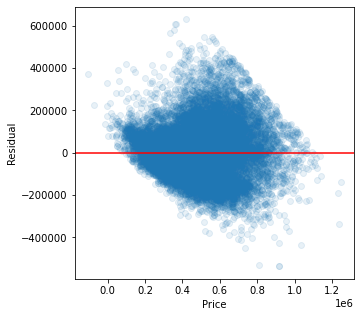

In [384]:
model_iqrp = model_summary(df_iqrp, x_targs, 'price')
sked_show(df_iqrp, x_targs, model_iqrp)

**Conclusions**
- R^2: 0.672
- Adjusted R^2: 0.672
- QQ Plot: Meets assumption but treads up slightly after the 2nd quantile
- Homoskedacicity: No cone shape, passes assumptions. 
- Non-Statistically Significant Preditors: None
- This model is highly preferable to removing all columns because all assumptions can be met and our data loss is much less significant

## Z-Score Method

- Z-score outlier removal is another method for classifying data as outliers
- To begin we standardize our values as z scores. This means that we are going to transform the data so that it has a mean of 0 and a standard deviation of 1. This allows us to compare different features without having to worry about differences in magnitude or units
- We will not standardize Boolean values
- From there, determine if a value is an outlier based on having a z-score greater than or less than 3
    - This rule of thumb comes from the empirical rule which states that 99.7% of observations will lay between 0 and 3 standard deviations from the mean
    - Essentially, we are classifying a vale as an outlier if it is in the 0.03% quintile
- This method is less strict at classifying outliers than IQR method

### Z-Score Method Accross All Columns
- In this approach, we are going to classify outlier observations as those with at least one outlier accross all features
- For example, if an observation is has bedrooms which are an outlier, it will be removed from the dataset
- This method is more strict for determining outliers
- CAUTION: we may have significant data loss

In [385]:
# Create scaler object

scaler = StandardScaler()
scaler

StandardScaler()

In [386]:
# Create new DF to prepare for fit and transform

df_z = df_linco.copy()

In [387]:
df_z.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long',
       'sqft_living15', 'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor'],
      dtype='object')

In [388]:
# Not scaling binary variables such as waterfront, renovated, and basement
# Binary Variables are already encoded and will not have outlier values because they are
# 0 or 1 
# Note: Scaling does not actually change values relative to each other, just changes mean and SD

cols_to_scale = ['price', 'bedrooms', 'bathrooms', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_living15', 'living_vs_neighbor',
       'lot_vs_neighbor']

In [390]:
# Fit and transform original values into scaled values

df_z[cols_to_scale] = scaler.fit_transform(df_z[cols_to_scale])
df_z.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000
mean,4581721940.59443,0.00000,0.00000,0.00000,-0.00000,0.01375,0.00000,-0.00000,0.00000,-0.00000,98077.87418,47.56007,-122.21373,0.00000,0.38500,0.03451,-0.00000,0.00000
std,2876772841.46664,1.00002,1.00002,1.00002,1.00002,0.11644,1.00002,1.00002,1.00002,1.00002,53.47983,0.13864,0.14083,1.00002,0.48661,0.18253,1.00002,1.00002
min,1000102.00000,-1.26066,-2.62718,-2.10519,-0.91774,0.00000,-0.30530,-3.71072,-3.97935,-1.71434,98001.00000,47.15590,-122.51900,-2.31800,0.00000,0.00000,-2.70489,-0.83891
25%,2124049194.50000,-0.58940,-0.41185,-0.47867,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.71259,98033.00000,47.47080,-122.32800,-0.72613,0.00000,0.00000,-0.53600,-0.15331
50%,3904930240.00000,-0.24815,-0.41185,0.17194,0.00814,0.00000,-0.30530,-0.63136,-0.56451,-0.27810,98065.00000,47.57190,-122.23000,-0.21545,0.00000,0.00000,-0.16707,-0.10418
75%,7309100170.00000,0.28260,0.69582,0.49724,0.93402,0.00000,-0.30530,0.90831,0.28920,0.51847,98117.00000,47.67810,-122.12400,0.55787,1.00000,0.00000,0.33705,-0.03167
max,9900000190.00000,19.48493,8.44950,7.65395,3.71165,1.00000,4.93089,2.44799,4.55775,9.19624,98199.00000,47.77760,-121.31500,6.16078,1.00000,1.00000,15.44602,67.16793


As we can see, the columns that we have scaled have a mean of 0 and standard deviation of 1

In [391]:
# Create new DataFrame where we are only going to include values that we have scaled that have a Z-Score 
# less than 3 and greater than -3

outliers_z = pd.DataFrame()

for col in cols_to_scale:
    outliers_z[col] = df_z[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_za = df_z[~outliers_z['total']].copy()

In [392]:
print(len(df_za))
df_za.describe()

19586


,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000,19586.00000
mean,4611432064.55560,-0.15122,-0.06274,-0.09889,-0.03280,0.00337,-0.17471,0.00617,-0.10222,-0.11109,98077.71475,47.55908,-122.21329,-0.09332,0.36889,0.02910,-0.09415,-0.05979
std,2875724714.26887,0.63588,0.93642,0.89444,0.99415,0.05795,0.54711,0.99029,0.87744,0.85271,53.10316,0.14028,0.14045,0.87888,0.48252,0.16810,0.80778,0.29411
min,1000102.00000,-1.24841,-2.62718,-2.10519,-0.91774,0.00000,-0.30530,-2.17104,-2.27193,-1.71434,98001.00000,47.15590,-122.51900,-1.99554,0.00000,0.00000,-2.43218,-0.83891
25%,2141310137.50000,-0.61559,-0.41185,-0.80398,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.74880,98033.00000,47.46460,-122.32800,-0.75531,0.00000,0.00000,-0.55571,-0.15473
50%,3918400133.00000,-0.28626,-0.41185,-0.15337,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.33845,98065.00000,47.57040,-122.22900,-0.27235,0.00000,0.00000,-0.16707,-0.10418
75%,7335400386.25000,0.16012,0.69582,0.49724,0.93402,0.00000,-0.30530,0.90831,0.28920,0.37364,98117.00000,47.67990,-122.12500,0.42655,1.00000,0.00000,0.25371,-0.04287
max,9900000190.00000,2.99080,2.91116,2.77438,2.78577,1.00000,2.31279,2.44799,2.85033,2.99266,98199.00000,47.77760,-121.31500,2.99455,1.00000,1.00000,2.99458,2.93377


- We have created a new DataFrame that only includes observations where all scaled values fall between -3 and 3 Z-scores
- Our mean and SD are no longer (0,1) because we have removed outiers, however this makes sense given that we are trying to remove outliers
- In total, we now have 19,586 observations

In [408]:
# Formula that returns z-score back to original value

def z_to_value(z, mu=df['price'].mean(), sd=df['price'].std()):
    """
    Converts z-score to original value
    """
    x = sd*z+mu
    return round(x,2)

In [417]:
print(f'Max price: ${z_to_value(2.99):,}')
print(f'Min price: ${z_to_value(-1.24841):,}')

Max price: $1,639,733.25
Min price: $82,490.54


The model will be able to infer prices of homes between \\$82,490 and $1,639,733

In [393]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_za):,}')
print(f'Num observations removed: {len(df)-len(df_za):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_za))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 19,586
Num observations removed: 1,801
Num observations removed as percent of original DF: 8.42%


With this type of outlier removal our data loss is aprox 8%. Going to see how the model performs with these constraints. Check model to see if assumptions are met

This method will remove more data then when we only consider an observation an outlier based on price constraints

### Model 3: Z-Score All Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2356.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:45:04   Log-Likelihood:                -8409.0
No. Observations:               19586   AIC:                         1.685e+04
Df Residuals:                   19569   BIC:                         1.699e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -82.7232      5.386    -15.358      0.000     -93.281     -72.166
bedrooms              -0.0235      0.004     -6.321      0.000      -0.031      -0.016
bathrooms             -0.0118      0.005     -2.424      0.015      -0.021      -0.002
floors                 0.0124      0.004      3.277      0.001       0.005       0.020
waterfront             0.9846      0.046     21.306      0.000       0.894       1.075
view                   0.0978      0.005     19.408      0.000       0.088       0.108
condition              0.0887      0.003     30.955      0.000       0.083       0.094
grade                  0.2229      0.005     44.259      0.000       0.213       0.233
sqft_above             0.1038      0.011      9.625      0.000       0.083       0.125
zipcode               -0.0006   6.42e-05     -8.824      0.000      -0.001      -0.000
lat                    1.6599      0.020     81.988      0.000       1.620       1.700
long                  -0.4844      0.025    -19.694      0.000      -0.533      -0.436
sqft_living15          0.2099      0.009     23.315      0.000       0.192       0.228
basementyes            0.1030      0.010     10.522      0.000       0.084       0.122
renovated_yes          0.2860      0.016     17.923      0.000       0.255       0.317
living_vs_neighbor     0.0956      0.007     13.310      0.000       0.082       0.110
lot_vs_neighbor        0.0411      0.009      4.451      0.000       0.023       0.059
==============================================================================
Omnibus:                     5373.127   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22555.797
Skew:                           1.298   Prob(JB):                         0.00
Kurtosis:                       7.572   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

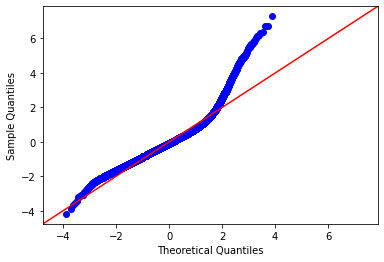

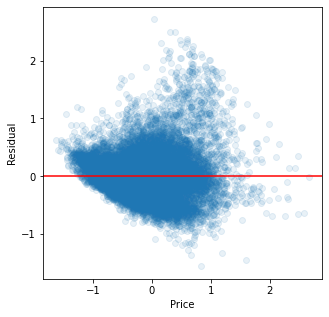

In [402]:
model_za = model_summary(df_za, x_targs, 'price')
sked_show(df_za, x_targs, model_za)

**Conclusions**
- R^2: 0.651
- Adjusted R^2: 0.650
- QQ Plot: Does not do a good job at meeting assumptions as residuals begin to trail off at 2nd quantile
- Homoskedacicity: Cone shaped, especially as model reaches Z-score of 0.75
- Non-Statistically Significant Preditors: None
- Model does not meet all 4 assumptions, however data loss is better than IQR all drop

### Z-Score Price Outliers Removed
- Rather than considering an observation an outlier solely based on one feature, we are only considering an observation to be an outlier if price is an outlier
- This method reduces data loss because we are less strict on classifying outliers
- Will be using same scaled data from previous model but only looking at price column

In [395]:
# Check to see if we have values greater than 3 and less than 3 in the price column
# Only need to worry about values greater than 3

df_z.describe()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000
mean,4581721940.59443,0.00000,0.00000,0.00000,-0.00000,0.01375,0.00000,-0.00000,0.00000,-0.00000,98077.87418,47.56007,-122.21373,0.00000,0.38500,0.03451,-0.00000,0.00000
std,2876772841.46664,1.00002,1.00002,1.00002,1.00002,0.11644,1.00002,1.00002,1.00002,1.00002,53.47983,0.13864,0.14083,1.00002,0.48661,0.18253,1.00002,1.00002
min,1000102.00000,-1.26066,-2.62718,-2.10519,-0.91774,0.00000,-0.30530,-3.71072,-3.97935,-1.71434,98001.00000,47.15590,-122.51900,-2.31800,0.00000,0.00000,-2.70489,-0.83891
25%,2124049194.50000,-0.58940,-0.41185,-0.47867,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.71259,98033.00000,47.47080,-122.32800,-0.72613,0.00000,0.00000,-0.53600,-0.15331
50%,3904930240.00000,-0.24815,-0.41185,0.17194,0.00814,0.00000,-0.30530,-0.63136,-0.56451,-0.27810,98065.00000,47.57190,-122.23000,-0.21545,0.00000,0.00000,-0.16707,-0.10418
75%,7309100170.00000,0.28260,0.69582,0.49724,0.93402,0.00000,-0.30530,0.90831,0.28920,0.51847,98117.00000,47.67810,-122.12400,0.55787,1.00000,0.00000,0.33705,-0.03167
max,9900000190.00000,19.48493,8.44950,7.65395,3.71165,1.00000,4.93089,2.44799,4.55775,9.19624,98199.00000,47.77760,-121.31500,6.16078,1.00000,1.00000,15.44602,67.16793


In [397]:
# Create new DataFrame only containing observations where the price has a Z-Score less than 3

df_zp = df_z[df_z['price'] < 3]

In [399]:
# Confirm that data has been removed
# Confirm that max price is less than 3

print(len(df_za))
df_zp['price'].max()

19586


2.990795957515217

In [413]:
print(f'Max price: ${z_to_value(2.99):,}')
print(f'Min price: ${z_to_value(-1.26066):,}')

Max price: $1,639,733.25
Min price: $77,989.74


The model will be able to infer prices of homes between \\$77,989 and $1,639,733

In [400]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_zp):,}')
print(f'Num observations removed: {len(df)-len(df_zp):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_zp))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 20,983
Num observations removed: 404
Num observations removed as percent of original DF: 1.89%


With this type of outlier removal our data loss is aprox 2%. Going to see how the model performs with these constraints. Check model to see if assumptions are met

This method removes the least amount of data which makes sense for two reasons. First, it is only classifying outliers as those that have a price outlier value. Second, Z-Score outlier removal is more strict than IQR outlier removal

#### Model 4: Z-Score Price Outliers Removed
- Considering an observation an outlier if price is above threshold
- This method reduces data loss compared to previous model because we are less strict on classifying outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2965.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:44:09   Log-Likelihood:                -9997.5
No. Observations:               20983   AIC:                         2.003e+04
Df Residuals:                   20966   BIC:                         2.016e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -83.7795      5.420    -15.458      0.000     -94.402     -73.157
bedrooms              -0.0232      0.004     -6.493      0.000      -0.030      -0.016
bathrooms             -0.0051      0.005     -1.083      0.279      -0.014       0.004
floors                 0.0068      0.004      1.819      0.069      -0.001       0.014
waterfront             0.7474      0.030     24.937      0.000       0.689       0.806
view                   0.0946      0.003     29.290      0.000       0.088       0.101
condition              0.0877      0.003     30.652      0.000       0.082       0.093
grade                  0.2301      0.005     46.767      0.000       0.221       0.240
sqft_above             0.1246      0.010     13.083      0.000       0.106       0.143
zipcode               -0.0006   6.47e-05     -9.398      0.000      -0.001      -0.000
lat                    1.6954      0.021     82.361      0.000       1.655       1.736
long                  -0.5124      0.025    -20.656      0.000      -0.561      -0.464
sqft_living15          0.1989      0.008     24.607      0.000       0.183       0.215
basementyes            0.1141      0.009     12.348      0.000       0.096       0.132
renovated_yes          0.2818      0.015     18.373      0.000       0.252       0.312
living_vs_neighbor     0.0856      0.006     14.348      0.000       0.074       0.097
lot_vs_neighbor        0.0162      0.003      5.921      0.000       0.011       0.022
==============================================================================
Omnibus:                     4884.904   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17444.930
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       6.835   Cond. No.                     1.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

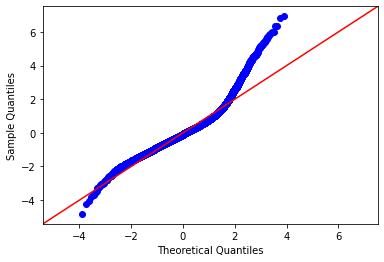

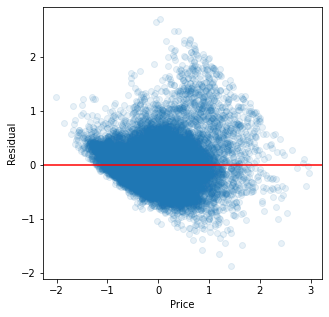

In [401]:
model_zp = model_summary(df_zp, x_targs, 'price')
sked_show(df_zp, x_targs, model_zp)

**Conclusions**
- R^2: 0.694
- Adjusted R^2: 0.694
- QQ Plot: Does not do a good job at meeting assumptions as residuals begin to trail off at 2nd quantile
- Homoskedacicity: Cone shaped, especially as model reaches Z-score of 0.75
- Non-Statistically Significant Preditors: Bathrooms and Floors
- Model does not meet all 4 assumptions, however data loss is **very** low

Unfortunately, this model is not sufficient because it does not meet the assumption of homoskedacicity

## Create table that shows our 4 models side by size and why I am picking the one I am picking

- Want a simply way to evaluate all 4 models and conclude which outlier removal strategy is most effective

In [444]:
# Create DataFrame that compares all 4 outlier removal types

d = {
    'Outlier Type': ['IQR-All', 'IQR-Price', 'Z-All', 'Z-Price'],
    'Data Loss %':[28.8,5.4,8.4,1.9],
     'R^2':[0.655, 0.676, 0.658, 0.694],
    'Homoskedacicty':['Pass', 'Pass', 'Fail', 'Fail'],
    'QQ Plot':['Pass', 'Pass', 'Fail', 'Fail'],
    'Min Price':[81000, 78000.0, 82490, 77989],
    'Max Price':[1120000, 1120000, 1639733, 1639733]
    }
table_o = pd.DataFrame(d)
table_o.set_index('Outlier Type')

,Data Loss %,R^2,Homoskedacicty,QQ Plot,Min Price,Max Price
Outlier Type,,,,,,
IQR-All,28.80000,0.65500,Pass,Pass,81000.00000,1120000
IQR-Price,5.40000,0.67600,Pass,Pass,78000.00000,1120000
Z-All,8.40000,0.65800,Fail,Fail,82490.00000,1639733
Z-Price,1.90000,0.69400,Fail,Fail,77989.00000,1639733


As we can see, each outlier removal type creates varying degrees of data loss. Due to the constraints of linear regression, our model must pass the assumption of homoskedacicity. For that reason, I am going to rule out Z-Score outlier removal methodologies. When left with IQR-Price and IQR-All, choosing price makes far more sense because the dat loss is much lower and the R^2 is higher. Max/Min price are very close together

# Model 2: OHE Variables

- Going to run a model to check how our accuracy and assumptions are met now that we have OHE the non-linear categorical variables
- Ensure the majority of OHE variables are statistically insignificant
    - If they are not, either drop the variable, or feature engineer to add nuance

In [ ]:
x_targs = df_ohe.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price')]

In [ ]:
# Confirm we have the list of target variables that we want
x_targs

In [ ]:
model_ohe = model_summary(df_ohe, x_targs, 'price')
sked_show(df_ohe, x_targs, model_ohe)

# Handling Categorical Variables with One Hot Encoding
- Dummy variables (one hot encoded variables) must be used to handle categorical variables because otherwise we will run into problems of multicollinearity. In other words, one of the dummy variables will be dropped because it can be explained by all of the others
- Our next step is to One Hot Encode the ordinal variables in our model
- These variables, when evaluated from an ordinal perpsetive, did not have a linear relationship with price
- However, we will evaluate their P-Values to determine if they have statistical significance as categorical variables
    - Majority of OHE variables must be statistically significant

## Check relationship of Non-Linear Categorical Variables with Price

In [ ]:
def ordinal_check(df, col, val='price'):
    """
    Produces stripplot and barplot to see if there is a linear relationship between
    the feature and price
    """
    fig, axes = plt.subplots(ncols=2, figsize=(20,6))
    sns.stripplot(data=df, x=col, y=val, ax=axes[0])
    sns.barplot(data=df, x=col, y=val, ax=axes[1], ci=68)

    fig.suptitle(f'Z-{col.upper()} vs. Price')
    plt.show()
    print('------------------------------------------------------------')
    print(df[col].value_counts(1))

In [ ]:
# Based on our findings in our linearity check we are going to inspect the following columns:

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'basementyes', 'renovated_yes', 'bedrooms']
for col in cat_bars:
    ordinal_check(df_linco, col)

Based on the results we are going to One Hot Encode the following variables: 
- Floors
- Zipcode
- Bedrooms
- Condition

This is because they do not appear ordinal. In other words, as the value of the independent variable increases, the price does not change at a constant rate. Check if they are statistically significant

In [95]:
dfds

NameError: name 'dfds' is not defined

## One Hot Encode Categorical Non-Ordinal Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

In [ ]:
# Seperate the columns we are going to OHE

cat_cols=['floors', 'zipcode', 'bedrooms', 'condition']

In [ ]:
# Fit and transform categorical columns
# Turn matrix into DataFrame

encoder.fit(df_linco[cat_cols])

ohe_vars = encoder.transform(df_linco[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [ ]:
# Confirm variables are OHE

cat_vars

In [ ]:
# OLS Formula does not accept '.' so must replace these with '_'

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

In [ ]:
# Rename cat_vars DF with new names so it can be processed by OLS formula

cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

In [ ]:
# Join OHE DF back with original Df

df_ohe = pd.concat([df_linco, cat_vars], axis=1)

In [ ]:
# Check to ensure that concat was done on the proper axis

df_ohe.head()

We now have a new DF called df_ohe that includes non-linear categorical variable as one hot encoded variables. This way, our model will be better meet assumptions of no multicollinearity, and all independent variables having a linear relationship with price. Important to drop original non OHE variables from DataFrame so they are not double counted

In [ ]:
# Drop non-OHE variables so they are not double counted

cols_to_drop = ['floors', 'zipcode', 'bedrooms', 'condition']
df_ohe.drop(cols_to_drop, axis=1, inplace=True)

In [94]:
# Confirm non-OHE variables have been dropped

df_ohe.head()

NameError: name 'df_ohe' is not defined